# Session 7: Data Visualization

*Nicklas Johansen*

## Recap (1:2)

*OK, so I have a collection of data that I want to analyze. How to get my data ready for analysis?*

If your data comes in different subsets:
- Using `merge`: Combining through one or multiple keys
- Using `concat` or `join`: Combining though index
- Inner join? Outer join? Left join? Might create missings.

Think about how to deal with missings or duplicates:
- Missings: Should these be dropped (`.dropna()`) or imputed (`.fillna()`)?
- Duplicates: What is a duplicate really? And should they be dropped (`.drop_duplicates()`)?

Think about whether your data has the right shape:
- Wide format or long format? Use `.stack()` or `.unstack()`

## Recap (2:2)

*How do I learn something about specific groups in the data?*

Use *split-apply-combine* framework to make group-specific computations:
- Leverages the `.groupby()` method
- Allows computation of mean, standard deviation, median, etc.

Flexibility of *split-apply-combine* framework:
- Can apply categories generated from multiple subcategories
- Can make computations on multiple variables on the same time
- Can apply multiple functions using the `.agg()` method

How to get group-specific computations back onto original dataframe?
- merge on keys?
- `.transform()`

## Agenda

In this session, we will imporve our visualizations skills in Python:
- Introduction to Plotting
- Plotting in Python: Packages and Grammar
- Plotting One Variable
- Plotting Two Numeric Variable
- Plotting Mixed Variables

In [1]:
# Loading packages

import numpy as np
import pandas as pd # For data structuring
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # Add-on toolkit for plt

# allow printing in notebook
%matplotlib inline 

# Ignore some annoying warnings
import warnings
warnings.filterwarnings('ignore')

# Introduction to Plotting

*What are we plotting?*

In the last sessions, we worked with generating, cleaning and making operations on data using pandas.
- When we plot, we essentially want to make a *visual* and *digestable* representation of these data.!

*What are some guidelines on making plots in **general**?

Be aware of *what* you plot
- numerical vs. non-numeric (categorical)
- raw data vs. model results vs. both (be clear!)

## Why We Plot

Someone should gain something from the plot...

An English adage
> A picture is worth a thousand words

Is that always the case?


## What Values Do A,B,C and D Have?
<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/excel1.png'></center>

## The Shocking Answer
<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/excel2.png'></center>


## Why Are You Plotting?
*Who's the audience?*

Internal audience (you/teammates):

- **Exploratory** plots: Figures for understanding data
    - Quick to produce $\sim$ minimal polishing
    - Interesting feature may by implied by the producer
    - Be careful showing these out of context
   

External audience (others):

- **Explanatory** plots: Figures to convey a message
    - Polished figures
    - Direct attention to interesting feature in the data
    - Minimize risk of misunderstanding

## How Should You Plot?
*What are some tips for making **explanatory** plots in a report?*  ***<font color="red">(Exam relevant!)</font>***

- Clear narratives - should convey key point(s)
  - If you want to show difference between groups in data make sure it is easy to distinguish them.
  

- Self explanatory
  - Contain axis label, title, footnotes in text containing relevant information.


- Nice appereance 
  - Choose the right plot type.
  - Make sure font type, size, colors, line width work together.


- Keep simplicity.
  - Anything unnecessary should be removed, see [this post](https://www.darkhorseanalytics.com/blog/data-looks-better-naked/).

*Some practical pieces advice on making **explanatory** plots?*

1. Try out a few plot types, using exploratory analysis - use what works.
1. Apply the *layered grammer of graphics*.
    - Start with an empty canvas
    - Fill the necessary things (axis, ticks, bars/lines, labels)
    
<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png" alt="drawing" width="600"/>

# Plotting in Python: Packages and Grammar

## How Are You Plotting?
There are two overall approaches to plotting:

- make a fast, decent figure
    - iteratively adjust if necessary
    - start out in `seaborn` continue to `matplotlib`


- from empty canvas to figure
    - iteratively add material and layers
    - performed in `matplotlib`
   

## Packages for Python Plotting (1:2)
*What is the fundamental tool for making plots in Python?*

`matplotlib` is the fundamental plotting module
- Can make almost any 2d plot.
- Can build publication ready figures.
- Caveat: 
    - requires time consuming customization (a bit like excel, but with a script!);
    - requires practice.

## Packages for Python Plotting (2:2)
*What are good tools for fast, exploratory plots?*

`seaborn` has built-in capabilities to make plots
- Analyzing data, e.g. splitting by subsets
- Make interpolation of data to smooth out noise.

`pandas` can easily convert Series and DataFrames to plots (you just tried that)

## Matplotlib and the Grammar of Graphics (1:4)
*Where do I start when making a plot?*

We will begin with the fundamental and flexible way. We start with our plotting canvas.

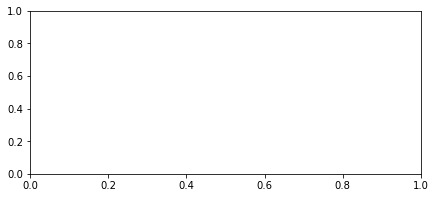

In [2]:
fig, ax = plt.subplots(figsize = (7, 3)) # create placeholder for plot

`fig` and `ax` are interrelated, but it is important to distinguish the two from each other:
- `ax` contains most of the chart content as objects: 
    -  grid axes, labels, shapes we draw etc.
- `fig` the actual plot which is displayed (export to pdf etc.)

## Matplotlib and the Grammar of Graphics (2:4)
*Is there a way to change the fundamental style of the plot?*

Yes, you can set a plotting style. Usually, however, you will not set this explicitly. There are lots of styles...

I recomment `ggplot` or simply `default` as styles.

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Matplotlib and the Grammar of Graphics (3:4)
*Are there any other defaults, that can be changed?*

A lot. With `plt.rc()`, we can change all sorts of default plotting styles. Consider the following:

In [3]:
plt.style.use('default') # set style (colors, background, size, gridlines etc.) # ggplot, default

plt.rc('figure', figsize=(6, 3)) # set default size of plots

font_options = {'family' : 'monospace', # define default font options
                'weight' : 'bold',
                'size'   : 12}

plt.rc('font', **font_options) # set default font options

## Matplotlib and the Grammar of Graphics (4:4)
*Now, let's take a look at our canvas*

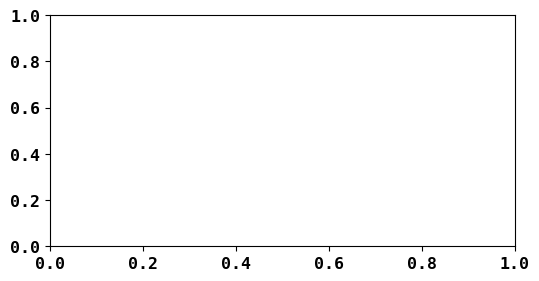

In [5]:
fig, ax = plt.subplots() # recreate placeholder for plot

## Plotting Something on Our Canvas (1:3)

Now, we want to plot something on our canvas! Luckily, Seaborn comes with some illustrative datasets. 

We load `tips` and explore it a bit...

In [6]:
tips = sns.load_dataset('tips')
print('Number of rows:',len(tips),'\n')
print(tips.head(5))

Number of rows: 244 

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Plotting Something on Our Canvas (2:3)
We will now draw plots of the tips data on the canvas. Let's plot the *numeric* variable `total_bill`:

[]

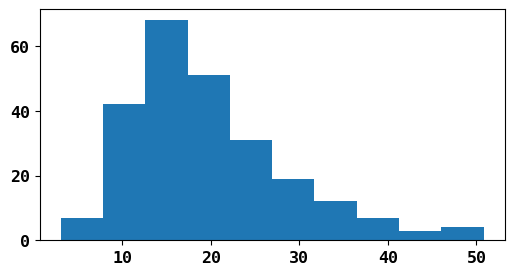

In [7]:
tb = tips['total_bill']

fig, ax = plt.subplots()
ax.hist(tb)
ax.plot()

## Plotting Something on Our Canvas (3:3)
Let's make some additional variable-specific customization and display:

In [8]:
props = {
    'title': 'Distribution of bill size',
    'xlabel': 'Total bill ($)',
    'ylabel': 'Count',
    'xlim': [0, 60]
}


fig, ax = plt.subplots()
ax.set(**props)
ax.hist(tb)

ax.plot()

# Plotting One Variable

## The Kernel Density Plot (1:4)
Let's now try with Seaborn and no customization:

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

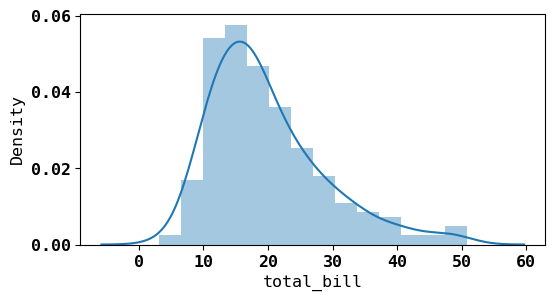

In [10]:
sns.distplot(tb,hist=True)

## The Kernel Density Plot (2:4)
Quite useful, right? Let's customize this a bit too...

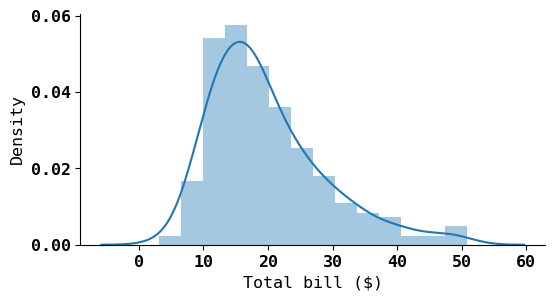

In [11]:
ax = sns.distplot(tb,hist=True)
ax.set(xlabel='Total bill ($)')
sns.despine()

## The Kernel Density Plot (3:4)
We can also easily plot the cumulative distribution. Customization...

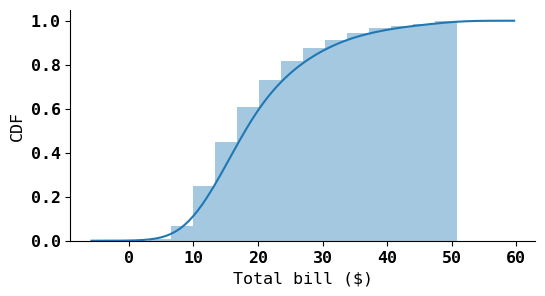

In [12]:
ax = sns.distplot(tb, hist_kws={'cumulative': True}, kde_kws={'cumulative': True}) 
ax.set(xlabel='Total bill ($)', ylabel='CDF')
sns.despine()

## The Kernel Density Plot (4:4)
There are still many things that we can play around with such as...
- Thickness?
- Color? 
- Showing raw data in different bins? 
- Subgroups?

Try and play around with this when you have time!

## Plotting One Categorical Variable (1:2)

Before, we plotted the *distribution* of a *numeric* variable.

Suppose we have data on gender. What does the distribution look like in the data?

Pie chart? Unfortunately, not possible with Seaborn...

<AxesSubplot:xlabel='sex', ylabel='count'>

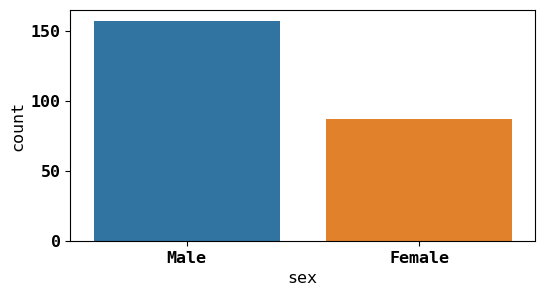

In [13]:
sns.countplot(x='sex', data=tips)

## Plotting One Categorical Variable (2:2)

That was not very informative. You might as well just present the actual numbers.

Luckily, this works for `matplotlib`:

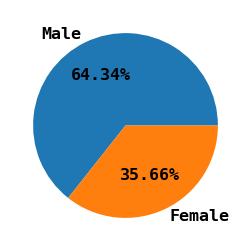

In [14]:
sizes =  tips.groupby('sex')['sex'].count() # Get size of different groups

fig, ax = plt.subplots()
ax.pie(sizes, labels=['Male', 'Female'], autopct='%1.2f%%')  # Make pie representation
plt.show()

## Wrapping Up on Tools This Far

How did our tools perform? 

- `matplotlib` is good for customization (**explanatory plots**)
- `seaborn` and `pandas` are good quick and dirty plots (**exploratory plots**)

Certain things are cumbersome in one package and straighforward in another!

# Plotting Two Numeric Variables

## Two Numeric Variables (1:8)
*Now, how do we plot two numeric variables?*

If we do not have too many observations, we can make a point cloud, i.e. a scatter plot.

[Text(0.5, 0, 'Total bill ($)'), Text(0, 0.5, 'Tips ($)')]

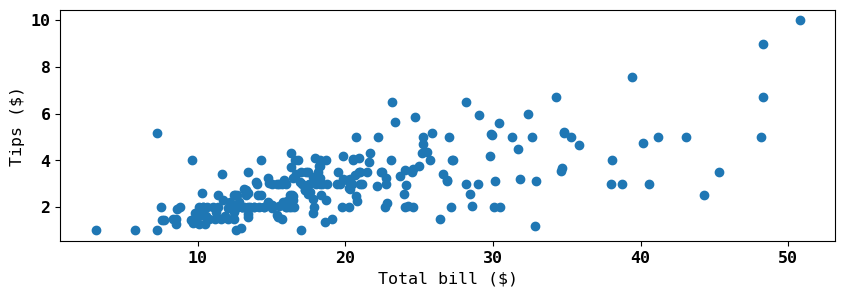

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.scatter(x=tips['total_bill'], y=tips['tip'])
ax.set(xlabel='Total bill ($)', ylabel='Tips ($)')

## Two Numeric Variables (2:8)
*What happens if we do have 'too' many observations?*

In [16]:
# simulate data

X = np.random.normal(0, 1, size=(2*10**4, 1))
Y = 2*X+0.5*np.random.normal(0, 1, size=(2*10**4, 1))

data = np.concatenate((Y,X),axis=1)
df= pd.DataFrame(data, columns=['Y','X'])

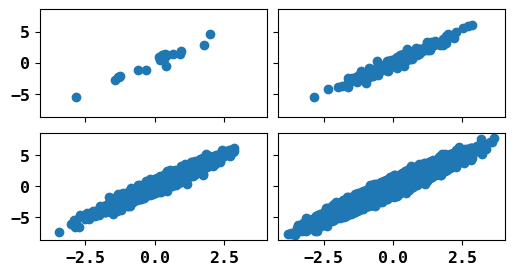

In [17]:
# display data

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sizes=0
for i in range(0,2):
    for j in range(0,2):
        sizes=sizes+1
        axes[i, j].scatter(x=df['X'][:2*10**sizes], y=df['Y'][:2*10**sizes])
plt.subplots_adjust(wspace=0.05, hspace=0.15)

## Two Numeric Variables (3:8)

If you insist on making a scatter plot, you can change the size of the scatter points...

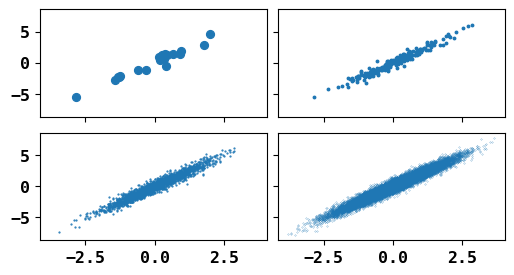

In [18]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sizes=0
for i in range(0,2):
    for j in range(0,2):
        sizes=sizes+1
        axes[i, j].scatter(x=df['X'][:2*10**sizes], y=df['Y'][:2*10**sizes], s=10**1.5/(10**(sizes-1)))
plt.subplots_adjust(wspace=0.05, hspace=0.15)

## Two Numeric Variables (4:8)

And you can also tweek the opacity:

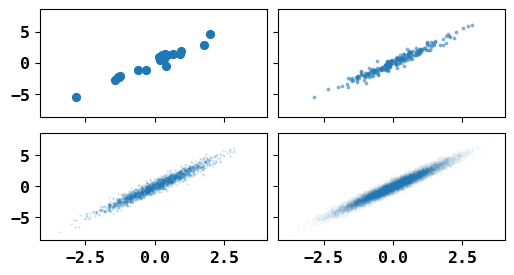

In [19]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sizes=0
for i in range(0,2):
    for j in range(0,2):
        sizes=sizes+1
        axes[i, j].scatter(x=df['X'][:2*10**sizes], y=df['Y'][:2*10**sizes],
                           s=10**1.5/(10**(sizes-1)), alpha=0.2**((sizes-1)/2))
plt.subplots_adjust(wspace=0.05, hspace=0.15)

## Two Numeric Variables (5:8)
*How might we alter the scatter plot?*

We can interpolate the data and jointly plot the marginal and joint distribution:

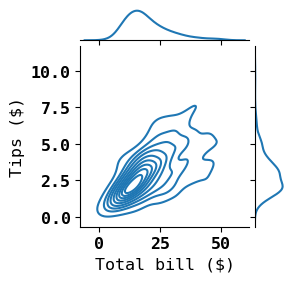

In [20]:
ax = sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde', size=3) # hex, reg, resid
ax.set_axis_labels('Total bill ($)', 'Tips ($)')

## Two Numeric Variables (6:8)

We can also plot the distribution with bars and hexagons for a different visiual representation!

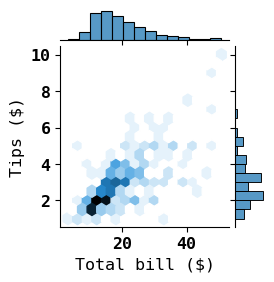

In [21]:
ax = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex', size=3) # kde, reg, resid
ax.set_axis_labels('Total bill ($)', 'Tips ($)')

## Two Numeric Variables (7:8)
In spite being fairly slow, this can be particularly useful with moderately large data sets:

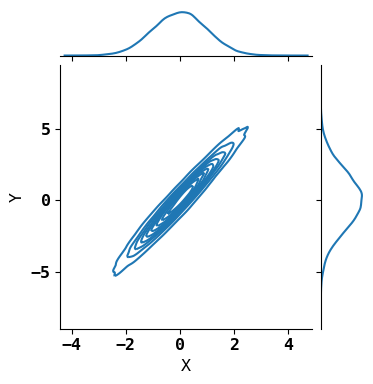

In [22]:
sizes=4
sns.jointplot(x=df['X'][:2*10**sizes], y=df['Y'][:2*10**sizes], kind='kde', size=4) # hex

## Two Numeric Variables (8:8)
*What if we want to see the linear relationship?*

We use the linear model plot:

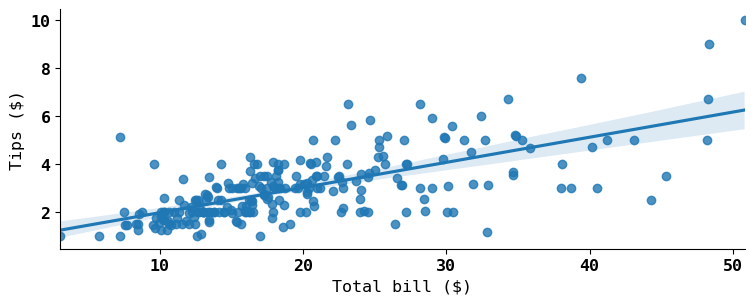

In [23]:
ax = sns.lmplot(x='total_bill', y='tip', data=tips, size=3, aspect=2.5) 
ax.set(xlabel='Total bill ($)', ylabel='Tips ($)')

# Plotting Mixed Variables

## Mixed: Categorical and Numeric Variables (1:6)

*How might we use categorical variables?*

- We can split data and make plots based on subsets of data!

## Mixed: Categorical and Numeric Variables (2:6)

*Can we say anything about gender-specific tipping behavior?*

- One simple way of getting an idea of the core traits of your data is to use the `catplot`

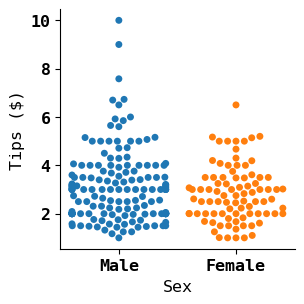

In [20]:
ax = sns.catplot(x="sex", y="tip", kind="swarm", data=tips, size=3)
ax.set(xlabel='Sex', ylabel='Tips ($)')

## Mixed: Categorical and Numeric Variables (3:6)

We can add a third dimension to this...

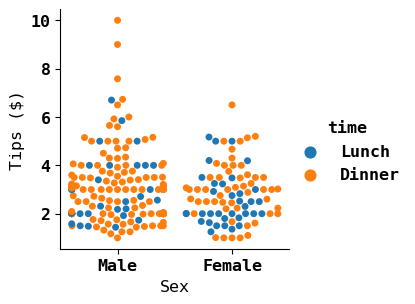

In [21]:
ax = sns.catplot(x="sex", y="tip", hue="time", kind="swarm", data=tips, size=3)
ax.set(xlabel='Sex', ylabel='Tips ($)')

## Mixed: Categorical and Numeric Variables (4:6)

And even utilize a kernel to smooth the (conditional) distributions!

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Tips ($)')]

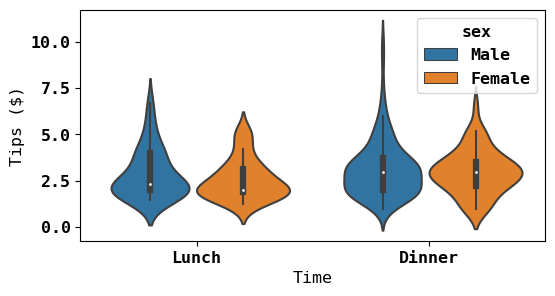

In [26]:
ax = sns.violinplot(x='time', y='tip', data=tips, hue='sex')
ax.set(xlabel='Time', ylabel='Tips ($)')

## Mixed: Categorical and Numeric Variables (5:6)

We can also directly assess whether the mean tipping behavior is different conditional on tipping

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Tips ($)')]

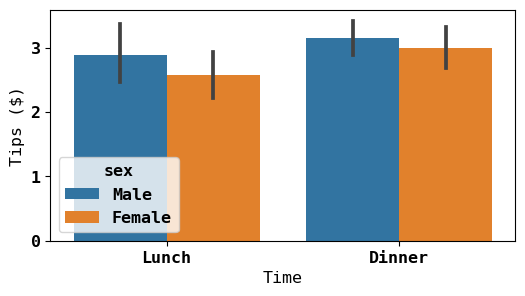

In [27]:
ax = sns.barplot(x='time', y='tip',  data=tips, hue='sex') 
ax.set(xlabel='Time', ylabel='Tips ($)')

## Mixed: Categorical and Numeric Variables (6:6)

Now, combining two continuous variables with one categorical

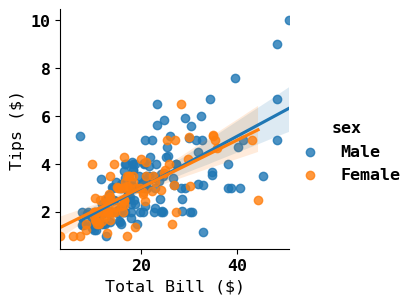

In [28]:
ax = sns.lmplot('total_bill', 'tip', hue='sex', data=tips, size=3)
ax.set(xlabel='Total Bill ($)', ylabel='Tips ($)')

## Advanced exploratory plotting 

*How can we plot the relationship for more than two numeric variables?*

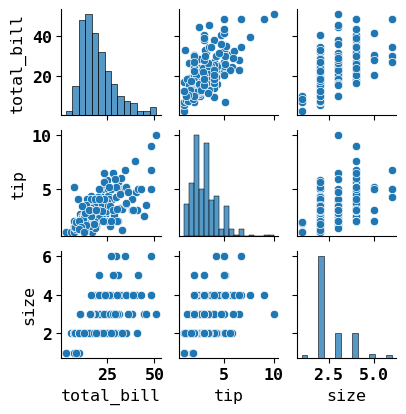

In [29]:
sns.pairplot(tips, height=2.3, size=1.4) # make hist and scatter for all

# Associated Readings+


Wickham (2010), sections 1-3
- Fundamentals of a plotting
- "Grammar of Graphics"

PDA, chapter 9:
- Basic syntax and fundamental concepts with matplotlib
- Combining matplotlib with pandas and using seaborn package

Moffitt (2017):
- Strengths and weaknesses of matplotlib
- Intro to `figure` and `axes`
- Using functions in order to improve formatting

# session_7_exercises.ipynb
Can be found on github today.
- Method 1: sync your cloned repo
- Method 2: download from git repo

`Remember` to create a local copy of the notebook